In [7]:
# ! pip install pytesseract pillow


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


In [1]:
import matplotlib.pyplot as plt
def show_image(image, title='', cmap_type='gray'):

# Display the original image using matplotlib
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


In [2]:
# Complex case 1:

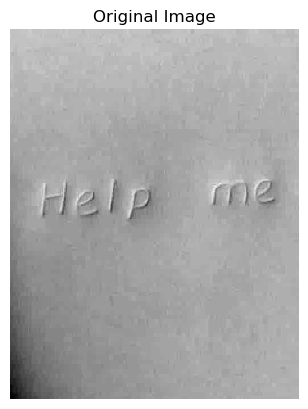

Displaying text using original image:



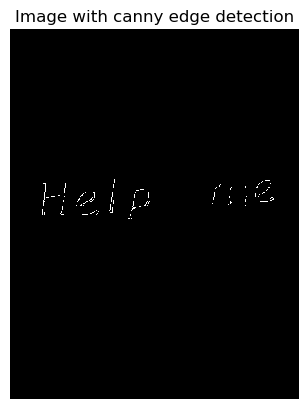

Displaying text after applying canny edge detection:



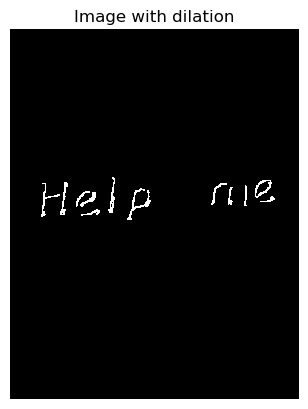

Displaying text after applying dilation:
Halp rie



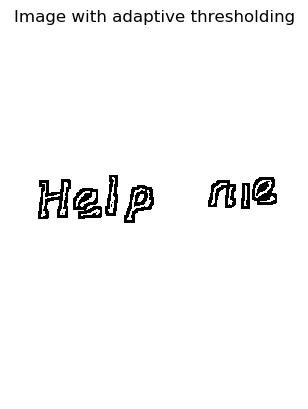

Displaying text after applying adaptive thresholding:
Help me



In [18]:
import cv2
import pytesseract

# Load the image in grayscale
image_path = 'indented.jpeg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
show_image(original_image,title='Original Image')
print("Displaying text using original image:")
print(pytesseract.image_to_string(original_image))

# Apply Canny edge detection
canny_edges = cv2.Canny(original_image, 40, 85)
show_image(canny_edges,title='Image with canny edge detection')
print("Displaying text after applying canny edge detection:")
print(pytesseract.image_to_string(canny_edges))

# Apply dilation to the edges
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated_edges = cv2.dilate(canny_edges, kernel, iterations=1)
show_image(dilated_edges,title='Image with dilation')
print("Displaying text after applying dilation:")
print(pytesseract.image_to_string(dilated_edges))

# Apply local thresholding using adaptive thresholding
local_thresholded = cv2.adaptiveThreshold(dilated_edges, 150, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 1)
show_image(local_thresholded,title='Image with adaptive thresholding')
print("Displaying text after applying adaptive thresholding:")
print(pytesseract.image_to_string(local_thresholded))

In [4]:
# Simple case

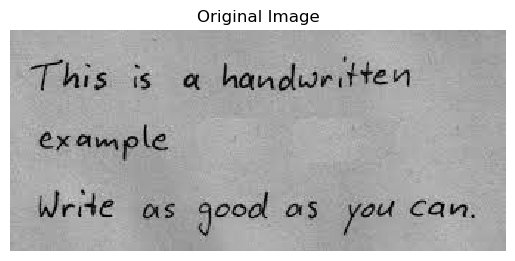

Displaying text using original image:
This is a handwritten
example

Write as geoal as you can.



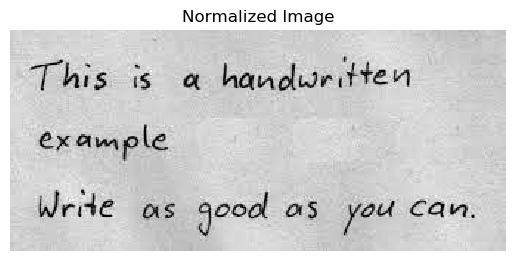

Displaying text after normalization:
This is a handwritten
example

Write as gooal as you can.



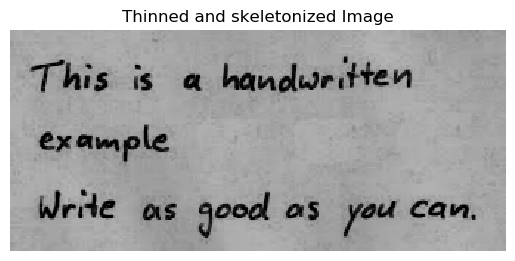

Displaying text after thinning and skeletonization:
This is a handwritten
example

Write as good as you can.



In [17]:
import cv2
import pytesseract
import numpy as np

# Load the image
image_path = 'simple.jpeg'
img = cv2.imread(image_path)
show_image(img,title='Original Image')
print("Displaying text using original image:")
print(pytesseract.image_to_string(img))

# Normalization
norm_img = np.zeros((img.shape[0], img.shape[1]))
norm_img = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)
show_image(norm_img, title='Normalized Image')
print("Displaying text after normalization:")
print(pytesseract.image_to_string(norm_img))

#Erosion
kernel = np.ones((2, 2),np.uint8)
sk_img = cv2.erode(img, kernel, iterations = 1)
show_image(sk_img, title='Eroded Image')
print("Displaying text after erosion:")
print(pytesseract.image_to_string(sk_img))

In [6]:
# Good

In [11]:
from PIL import Image

# Open the image
image_path = 'arabic.jpg'
original_image = Image.open(image_path)

# Desired size
desired_size = (680, 439)

# Resize the image
original_image = original_image.resize(desired_size)

# Get the size (dimensions) of the image
image_size = original_image.size

print("Image Size:", image_size)

Image Size: (680, 439)


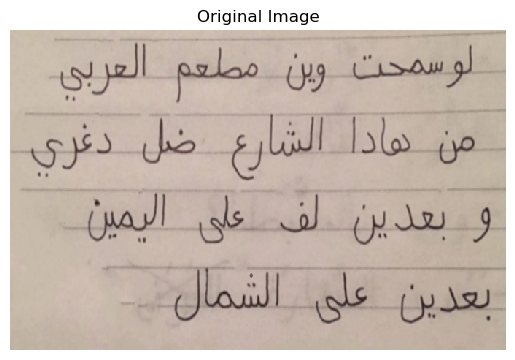

Displaying text using original image
لوسمحت. .وين مطعم.. العربى
من. هادا الشارع ضل.. دغردي
و بعدين. .لف ...على اليمين
بعدين. على... الشمال



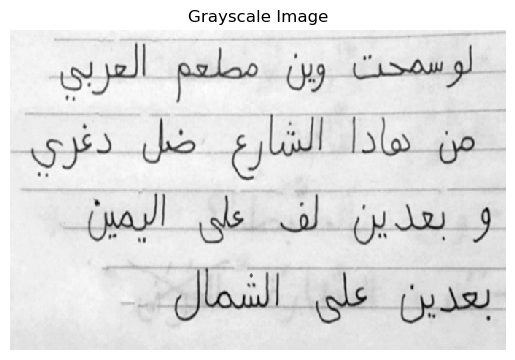

Displaying text using grayscale image
لوسمحت..وين... مطعم... العربى
من. هادا الشارع ضل.. دغري
و بعدين... لف.. .على اليمين
بعدين. على.. الشمال



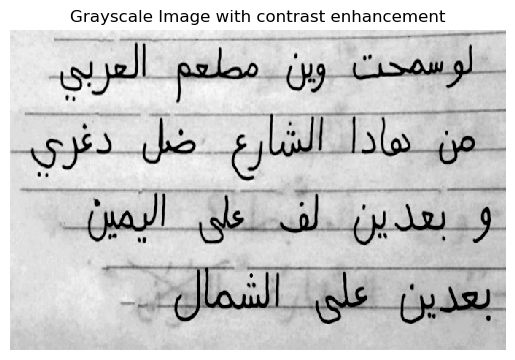

Displaying text using grayscale image with application of contrast enhancement using contrast_factor = 2.65
لوسمحت. .وين مطلعم.. العربي
من هادا الشارع ضل_ دغري
:و بعدين...لف.._عاى. اليمين ‏



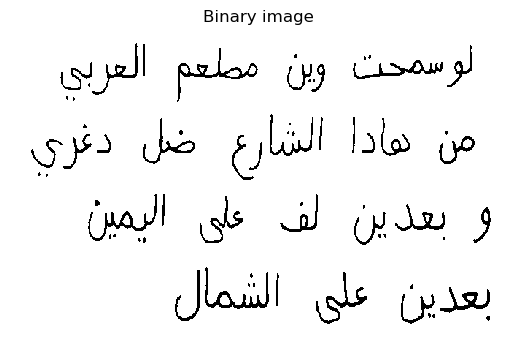

Displaying text after application of binary thresholding
لوسمحت وين مطعم العربي
من هادا الشارع ضل دغري
و بعدين لف على اليمين
بعدين على الشمال



In [16]:
from PIL import ImageEnhance
from PIL import ImageOps  # Add this import for ImageOps
from pytesseract import image_to_string

show_image(original_image, title='Original Image')
print("Displaying text using original image")
text=image_to_string(original_image, lang='ara')
print(text)

# Convert the original image to grayscale
grayscale_image = original_image.convert('L')
show_image(grayscale_image, title='Grayscale Image')
print("Displaying text using grayscale image")
text=image_to_string(grayscale_image, lang='ara')
print(text)


# Contrast enhancement
enhancer = ImageEnhance.Contrast(grayscale_image)
contrast_factor = 2.65
enhanced_image = enhancer.enhance(contrast_factor)

# Convert the enhanced image to grayscale
grayscale_enhanced_image = enhanced_image.convert('L')

show_image(grayscale_enhanced_image,title='Grayscale Image with contrast enhancement')
print("Displaying text using grayscale image with application of contrast enhancement using contrast_factor = 2.65")
text=image_to_string(grayscale_enhanced_image,lang='ara')
print(text)

# Binary Thresholding
threshold_value = 47
binary_image = ImageOps.grayscale(grayscale_enhanced_image).point(lambda p: 255 if p > threshold_value else 0)
show_image(binary_image,title='Binary image')
print("Displaying text after application of binary thresholding")
text=image_to_string(binary_image,lang='ara')
print(text)
  